In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import files 
  
uploaded = files.upload()

Saving cell_samples.csv to cell_samples.csv


In [6]:
import io 
cell_df = pd.read_csv(io.BytesIO(uploaded['cell_samples.csv'])) 
print(cell_df)

          ID  Clump  UnifSize  UnifShape  ...  BlandChrom  NormNucl Mit  Class
0    1000025      5         1          1  ...           3         1   1      2
1    1002945      5         4          4  ...           3         2   1      2
2    1015425      3         1          1  ...           3         1   1      2
3    1016277      6         8          8  ...           3         7   1      2
4    1017023      4         1          1  ...           3         1   1      2
..       ...    ...       ...        ...  ...         ...       ...  ..    ...
694   776715      3         1          1  ...           1         1   1      2
695   841769      2         1          1  ...           1         1   1      2
696   888820      5        10         10  ...           8        10   2      4
697   897471      4         8          6  ...          10         6   1      4
698   897471      4         8          8  ...          10         4   1      4

[699 rows x 11 columns]


In [7]:
cell_df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [8]:
cell_df.shape

(699, 11)

In [9]:
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [10]:
cell_df.size

7689

In [11]:
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

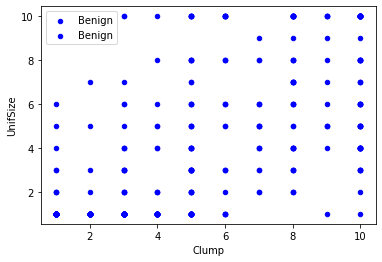

In [15]:
benign_df=cell_df[cell_df['Class']==2][0:200]
malignant_df=cell_df[cell_df['Class']==4][0:200]

axes=benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign',ax=axes)

In [16]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [17]:
pd.to_numeric(cell_df['BareNuc'],errors='coerce')

0       1.0
1      10.0
2       2.0
3       4.0
4       1.0
       ... 
694     2.0
695     1.0
696     3.0
697     4.0
698     5.0
Name: BareNuc, Length: 699, dtype: float64

In [21]:
cell_df=cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]
cell_df['BareNuc']=cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [25]:
cell_df.columns
feature_df=cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x=np.asarray(feature_df)

y=np.asarray(cell_df['Class'])

x[0:5]

y[0:5]


array([2, 2, 2, 2, 2])

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

x_train.shape #546x9

y_train.shape  #546 x 1

x_test.shape    #137 x 9

y_test.shape   #137 x 1





(137,)

In [37]:
from sklearn import svm

classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(x_train,y_train)

y_predict=classifier.predict(x_test)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

